# **⚡ Lennard Jones Potential**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **🧪 Metric**

In [2]:
# Metric definition.
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

## **🧬 Classic Potential**

In [3]:
# Classic potential.
def classic_potential(r, epsilon=1.0, sigma=1.0):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

## **📊 Curve**

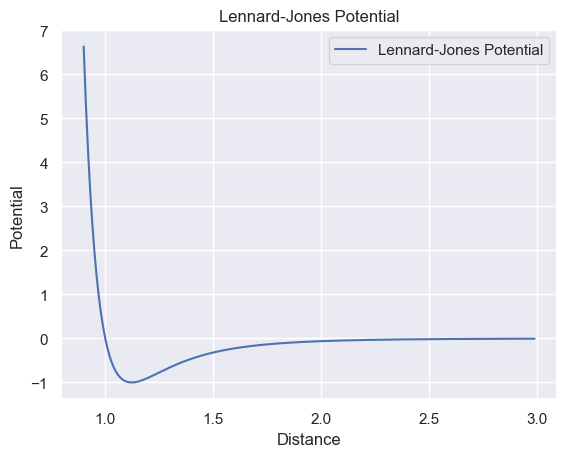

In [4]:
# Plotting the curve now.
sns.set_theme(style="darkgrid")
rs = np.arange(.9, 3., .01)
sns.lineplot(x=rs, y=classic_potential(rs))
plt.title("Lennard-Jones Potential")
plt.xlabel("Distance")
plt.ylabel("Potential")
plt.legend(["Lennard-Jones Potential"])
plt.show()

## **🧮 Pairwise Potential**

In [5]:
# Custom intermolecular pairwise potential energy for all.
def intermolecular_pair_potential(coordinates, epsilon=1.0, sigma=1.0):
    sum = 0.0
    n = len(coordinates)

    # First summation.
    for i in range(n - 1):

        # Second summation.
        for j in range(i + 1, n):
            r = euclidean_distance(coordinates[i], coordinates[j])
            sum += classic_potential(r, epsilon, sigma)
    
    return sum

## **🚀 Finite Difference**

In [ ]:
# The optimization process. We used the finite difference method to calculate the gradient.
def optimize_coordinates(initial_coords, epsilon=1.0, sigma=1.0, lr=0.01, max_iter=100, tol=1e-6):
    coords = initial_coords.copy()

    # A wrapper for reshaping.
    def energy_wrapper(flat_coords):
        reshaped = flat_coords.reshape((-1, coords.shape[1]))
        return intermolecular_pair_potential(reshaped, epsilon, sigma)

    # Iterative method.
    for it in range(max_iter):
        flat_coords = coords.flatten()
        grad_approx = np.zeros_like(flat_coords)
        h = 1e-5

        # One more like the last one.
        for i in range(len(flat_coords)):
            x1 = flat_coords.copy()
            x2 = flat_coords.copy()
            x1[i] += h
            x2[i] -= h
            grad_approx[i] = (energy_wrapper(x1) - energy_wrapper(x2)) / (2 * h)

        flat_coords -= lr * grad_approx
        coords = flat_coords.reshape(coords.shape)
        if np.linalg.norm(grad_approx) < tol:
            print(f"Converged at iteration {it}")
            break

    return coords

## **🎲 Normally Distributed Particles**

In [ ]:
# Determinism.
np.random.seed(42)
initial_coords = np.random.rand(10, 3)  # 5 particles in 3D
optimized_coords = optimize_coordinates(initial_coords)

# Showing the results.
print("Optimized Coordinates:")
print(optimized_coords)
print("Potential Energy:", intermolecular_pair_potential(optimized_coords))

Converged at iteration 1
Optimized Coordinates:
[[ 3.28654089e+05  8.81972217e+04  1.36784779e+05]
 [-4.78815682e+07 -1.15500016e+07 -5.29253536e+06]
 [-3.29432452e+05 -8.69492881e+04 -1.35327888e+05]
 [ 1.04592273e+03 -1.01967851e+03  1.35915949e+03]
 [ 4.78894523e+07  1.15343224e+07  5.29139347e+06]
 [ 1.91644406e+09  5.32968310e+08  6.96246445e+09]
 [ 1.52845091e+07 -7.93757688e+05  5.40834575e+06]
 [-1.93173399e+09 -5.32173588e+08 -6.96786874e+09]
 [-6.33433549e+06  2.09952748e+07  1.66871198e+07]
 [ 6.33160963e+06 -2.09807838e+07 -1.66928439e+07]]
Potential Energy: -3.31769921193271e-33


## **⭐ System**

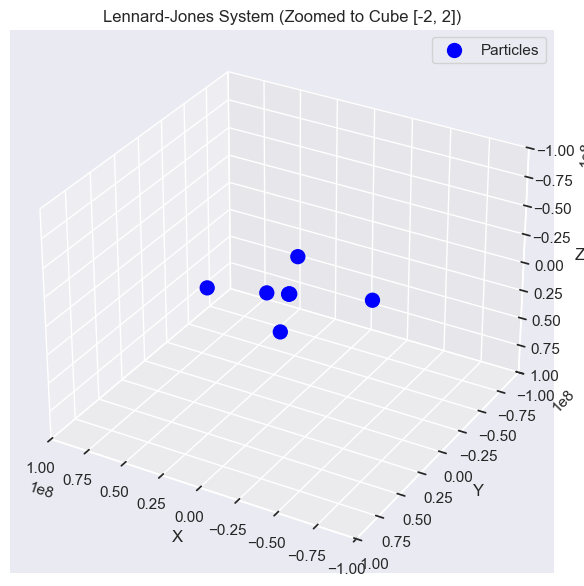

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
coordinates = optimized_coords
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]
ax.scatter(x, y, z, color='red', s=100, label='Particles')
lower_lim = 1e8
upper_lim = -1e8
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.set_zlim(lower_lim, upper_lim)
ax.set_title("Lennard-Jones System (Zoomed to Cube [-2, 2])")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.tight_layout()
plt.show()
